In [1]:
%%html
<style>
table {float:left}
</style>

In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('..')
import script.data as data
import script.utils as utils

### 603939 益丰药房

In [3]:
ticker = '603939'

In [4]:
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
mkt = data.get_market(ticker)
bs = data.get_BS(ticker)

In [5]:
change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change.set_index('截止日期')

,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
截止日期,,,,,
2019-12-31,1.443,1.442,"10,276,174,735 (48.7%)","9,485,875,418 (48.4%)","543,750,303 (30.6%)"
2018-12-31,1.144,1.144,"6,912,576,542 (43.8%)","6,390,019,897 (44.5%)","416,414,103 (32.8%)"
2017-12-31,0.864,0.864,"4,807,249,009 (28.8%)","4,420,941,979 (28.0%)","313,503,561 (40.0%)"
2016-12-31,0.663,0.663,"3,733,619,135 (31.2%)","3,452,642,197 (31.8%)","223,891,074 (27.3%)"
2015-12-31,0.570,0.570,"2,845,515,856 (27.6%)","2,620,250,197 (28.1%)","175,935,963 (25.2%)"
2014-12-31,0.590,0.590,"2,230,225,650 (23.6%)","2,045,398,928 (22.4%)","140,561,204 (41.7%)"
2013-12-31,0.830,0.830,"1,804,299,344 (17.2%)","1,671,504,604 (15.4%)","99,187,743 (44.6%)"
2012-12-31,0.570,0.570,"1,539,478,431 (nan%)","1,447,997,864 (nan%)","68,603,720 (nan%)"


In [6]:
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
incomeq_change[:24].set_index('截止日期')

,营业收入,归属于母公司所有者的净利润
截止日期,,
2020-06-30,"3,244,900,839 (25.8%)","221,419,480 (37.7%)"
2020-03-31,"3,047,958,361 (23.4%)","190,850,517 (29.7%)"
2019-12-31,"2,887,427,879 (28.5%)","125,437,069 (16.5%)"
2019-09-30,"2,340,473,618 (40.0%)","110,287,853 (32.0%)"
2019-06-30,"2,578,843,222 (70.6%)","160,856,378 (29.5%)"
2019-03-31,"2,469,430,016 (66.7%)","147,169,003 (45.8%)"
2018-12-31,"2,246,921,307 (61.9%)","107,655,016 (15.4%)"
2018-09-30,"1,672,318,046 (41.7%)","83,554,823 (27.8%)"
2018-06-30,"1,511,705,160 (30.3%)","124,246,062 (45.4%)"


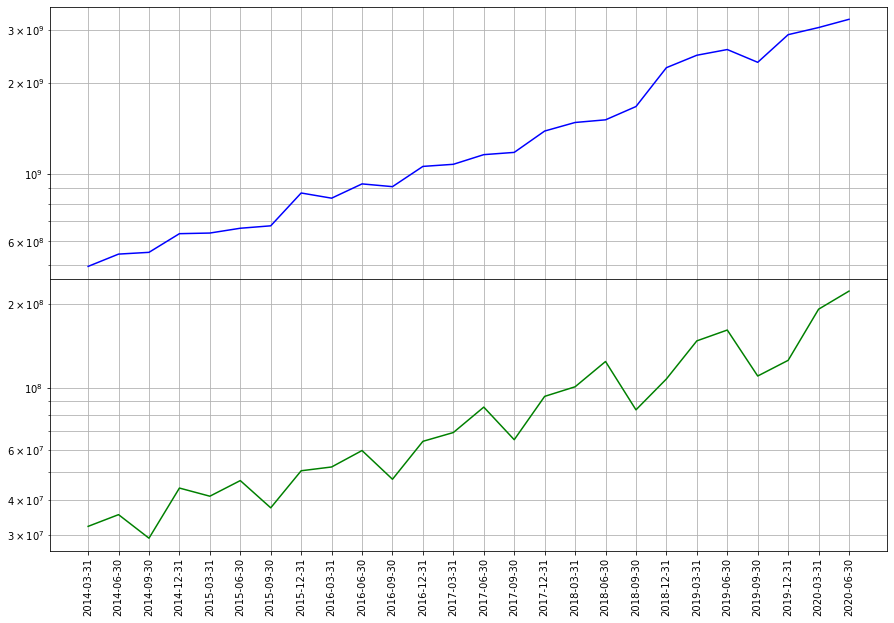

In [7]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [8]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,39.0,5.9
2018-12-31,39.7,6.4
2017-12-31,40.0,6.6
2016-12-31,39.6,6.1
2015-12-31,39.2,6.3
2014-12-31,39.8,6.4
2013-12-31,38.7,5.6
2012-12-31,37.2,4.5


In [9]:
change = utils.column_pct(bs[['存货', '应付账款', '应收账款']], periods=-1)
bs_change = pd.concat([bs[['截止日期']], change], axis=1)
bs_change.set_index('截止日期', inplace=True)
change = utils.column_pct(income[['营业收入']], periods=-1)
income_change = pd.concat([income[['截止日期']], change], axis=1)
income_change.set_index('截止日期', inplace=True)
pd.concat([income_change, bs_change], axis=1)

,营业收入,存货,应付账款,应收账款
截止日期,,,,
2019-12-31,"10,276,174,735 (48.7%)","1,820,601,625 (26.4%)","807,882,438 (25.0%)","750,235,295 (24.1%)"
2018-12-31,"6,912,576,542 (43.8%)","1,440,483,226 (88.5%)","646,212,175 (102.8%)","604,706,228 (78.6%)"
2017-12-31,"4,807,249,009 (28.8%)","764,160,321 (4.7%)","318,683,873 (29.8%)","338,598,312 (37.2%)"
2016-12-31,"3,733,619,135 (31.2%)","730,060,058 (49.1%)","245,497,797 (16.6%)","246,863,352 (35.4%)"
2015-12-31,"2,845,515,856 (27.6%)","489,771,047 (49.5%)","210,540,920 (60.3%)","182,383,341 (67.8%)"
2014-12-31,"2,230,225,650 (23.6%)","327,608,865 (24.3%)","131,320,403 (31.9%)","108,717,215 (34.4%)"
2013-12-31,"1,804,299,344 (17.2%)","263,552,084 (21.5%)","99,539,646 (14.8%)","80,884,208 (47.3%)"
2012-12-31,"1,539,478,431 (nan%)","216,977,328 (nan%)","86,676,256 (nan%)","54,916,668 (nan%)"


In [10]:
mkt['前复权'] = mkt['收盘价'] * mkt['累积前复权因子']
mkt['前复权'] = mkt['前复权'].round(2)
mkt['滚动市盈率'] = mkt['滚动市盈率'].round(1)
mkt[['收盘价', '前复权', '滚动市盈率']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max'])[-10:]

收盘价            前复权         滚动市盈率       
        min     max    min     max   min    max
交易日期                                           
2015  28.04  115.65   9.72   40.11  31.9  123.7
2016  25.13   38.01  17.54   26.53  45.7   69.1
2017  26.76   45.62  18.68   32.15  41.4   58.1
2018  40.99   65.69  28.89   46.53  38.7   73.6
2019  39.26   89.16  27.81   63.48  36.8   67.5
2020  68.47  105.42  50.55  105.42  51.2   86.4